# Confidence interval

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
#-------------------
import scipy.stats as stats
import statistics

In [2]:
# read data and create DataFram
path = "D:/Last project Data Analayses/Music Analysis/data/processed/Dataframe"
dir_list = os.listdir(path)
variable_names = dir_list.copy()
for i in range(len(variable_names)):
    variable_names[i] = variable_names[i].replace(".csv","")

file_names = dir_list

for var_name, file_name in zip(variable_names, file_names):
    print(f"name {var_name}    and file {var_name}")
    globals()[var_name] = pd.read_csv(f'D:/Last project Data Analayses/Music Analysis/data/processed/Dataframe/{file_name}').drop("Unnamed: 0", axis=1)


name album    and file album
name artist    and file artist
name customer    and file customer
name employee    and file employee
name genre    and file genre
name invoice    and file invoice
name invoiceline    and file invoiceline
name mediatype    and file mediatype
name playlist    and file playlist
name playlisttrack    and file playlisttrack
name track    and file track


Is the length of songs the same in different genres? Calculate their 95% confidence interval for the mean length of songs in each genre

In [3]:
track.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3503 entries, 0 to 3502
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TrackId       3503 non-null   int64  
 1   Name          3503 non-null   object 
 2   AlbumId       3503 non-null   int64  
 3   MediaTypeId   3503 non-null   int64  
 4   GenreId       3503 non-null   int64  
 5   Composer      2526 non-null   object 
 6   Milliseconds  3503 non-null   int64  
 7   Bytes         3503 non-null   int64  
 8   UnitPrice     3503 non-null   float64
dtypes: float64(1), int64(6), object(2)
memory usage: 246.4+ KB


<Axes: xlabel='avg_time', ylabel='Count'>

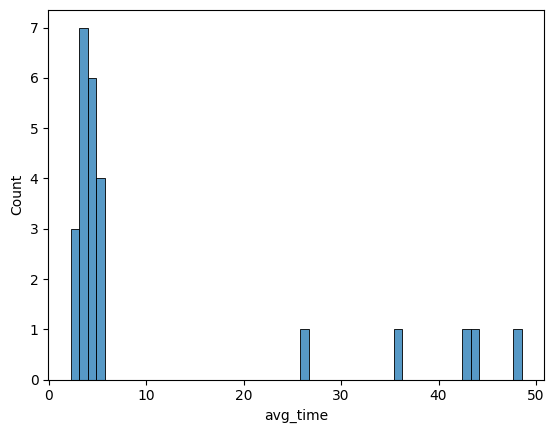

In [5]:
genre_count_track_avrage_time = (track[['TrackId', 'GenreId','Milliseconds']].groupby('GenreId')
                                .agg(count_track=('TrackId',np.count_nonzero),
                                    avg_time = ('Milliseconds', np.average))
                                    .reset_index())

genre_count_track_avrage_time['avg_time'] = genre_count_track_avrage_time['avg_time']/60000

sns.histplot(genre_count_track_avrage_time['avg_time'])

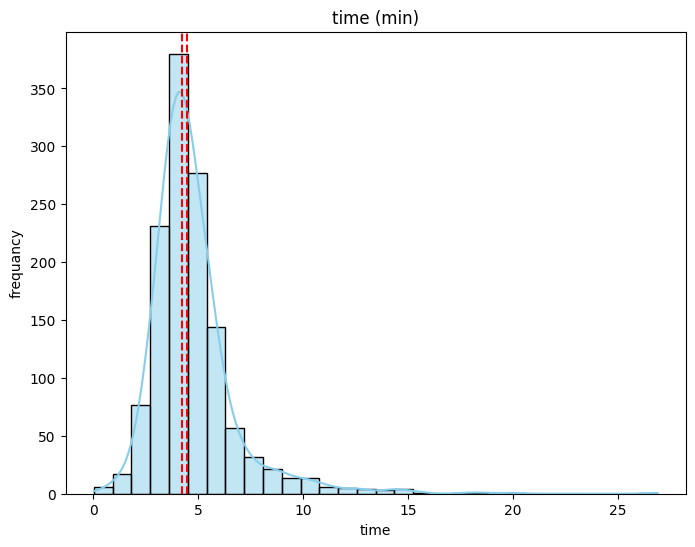

1.959963984540054


In [67]:
genre_count_track_avrage_time = (track[['TrackId', 'GenreId','Milliseconds']])
a = (genre_count_track_avrage_time[genre_count_track_avrage_time['GenreId'] == 1]['Milliseconds'])/60000
a.to_csv("C:/Users/user/Desktop/a.csv")
time_mean = np.median(a)
time_std = np.std(a)
n = len(a)

conidence_level = 0.95

z = stats.norm.ppf(1 - (1 - conidence_level) / 2) # critical value

standard_error = time_std / np.sqrt(n)

lower_bound = time_mean - z * standard_error
upper_bound = time_mean + z * standard_error

plt.figure(figsize=(8, 6))
sns.histplot(a, kde=True ,color='skyblue',bins=30)
plt.axvline(x = lower_bound ,color='red', linestyle='--', label= 'lower Bound (95% CI)')
plt.axvline(x = upper_bound ,color='red', linestyle='--', label= 'upper Bound (95% CI)')
plt.title('time (min)')
plt.xlabel('time')
plt.ylabel('frequancy')
plt.show()

print(z)




In [69]:
print(np.median(a), np.mean(a))

4.327183333333333 4.7318340529426886


In [52]:
conidence_level = 0.95

z = stats.norm.ppf(1 - (1 - conidence_level) / 2) # critical value

standard_error = time_std / np.sqrt(n)

lower_bound = time_mean - z * standard_error
upper_bound = time_mean + z * standard_error

print(lower_bound, upper_bound)

4.616869640340029 4.846798465545348


Mean length of songs: 4.7318340529426886 milliseconds
95% confidence interval: (np.float64(4.616717870260486), np.float64(4.846950235624891))


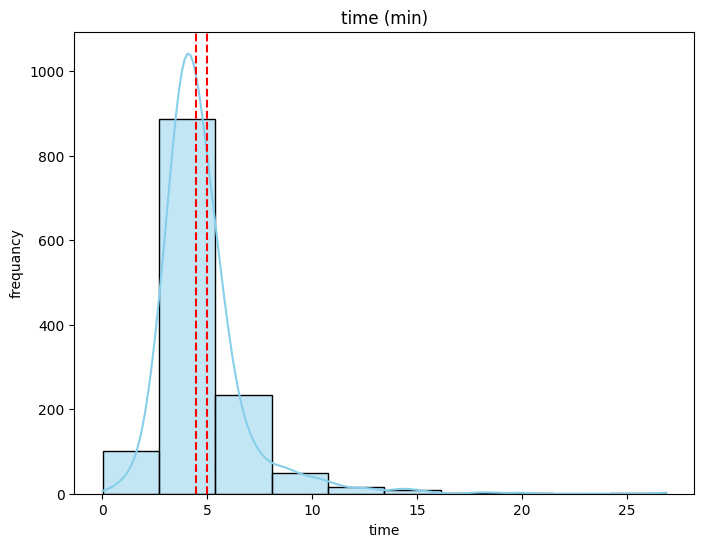

In [59]:
genre_count_track_avrage_time = (track[['TrackId', 'GenreId','Milliseconds']])
a = (genre_count_track_avrage_time[genre_count_track_avrage_time['GenreId'] == 1]['Milliseconds'])/60000
a.to_csv("C:/Users/user/Desktop/a.csv")
time_mean = np.mean(a)
time_std = np.std(a)
sem = stats.sem(a)
n = len(a)

conidence_level = 0.95

z = stats.t.interval(0.95, len(a), loc=time_mean, scale=sem)
print(f"Mean length of songs: {time_mean} milliseconds")
print(f"95% confidence interval: {z}")
standard_error = time_std / np.sqrt(n)

lower_bound = time_mean - z[1] * standard_error
upper_bound = time_mean + z[1] * standard_error

plt.figure(figsize=(8, 6))
sns.histplot(a, kde=True ,color='skyblue',bins=10)
plt.axvline(x = lower_bound ,color='red', linestyle='--', label= 'lower Bound (95% CI)')
plt.axvline(x = upper_bound ,color='red', linestyle='--', label= 'upper Bound (95% CI)')
plt.title('time (min)')
plt.xlabel('time')
plt.ylabel('frequancy')
plt.show()





In [57]:
z[0]

np.float64(4.616717870260486)